In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
matplotlib.rcParams.update({'font.size': 28})
import sys
sys.path.append(r'C:\Users\Rory\extra_repos\ruairitran\package')
from ephys_plots import heatmap_by_cluster

In [2]:
save_dir = r'E:\figures\drug_effects'

In [3]:
def loader(par, exp):
    increase = f'{exp}_increase.csv'
    increase = pd.read_csv(os.path.join(par, increase), index_col=0)
    
    decrease = f'{exp}_decrease.csv'
    decrease = pd.read_csv(os.path.join(par, decrease), index_col=0)
    
    non_responders = f'{exp}_two tailed.csv'
    non_responders = pd.read_csv(os.path.join(par, non_responders), index_col=0)
    
    return increase, decrease, non_responders

In [4]:
d = r'E:\db\drug_effects'
exp = 'sert'

gq_increase, gq_decrease, gq_non_responders = loader(d, f'{exp}_gq')
mcherry_increase, mcherry_decrease, mcherry_non_responders = loader(d, f'{exp}_mcherry')


In [5]:
ci = {col: {'Virus':'hM3Dq', 'Response': 'Increase'} for col in gq_increase.columns}
cd = {col: {'Virus':'hM3Dq', 'Response': 'Decrease'} for col in gq_decrease.columns}
cn = {col: {'Virus':'hM3Dq', 'Response': 'No Response'} for col in gq_non_responders.columns}

gq = {**ci, **cd, **cn}

In [6]:
ci = {col: {'Virus':'mCherry', 'Response': 'Increase'} for col in mcherry_increase.columns}
cd = {col: {'Virus':'mCherry', 'Response': 'Decrease'} for col in mcherry_decrease.columns}
cn = {col: {'Virus':'mCherry', 'Response': 'No Response'} for col in mcherry_non_responders.columns}

mcherry = {**ci, **cd, **cn}

In [7]:
both = {**gq, **mcherry}

In [8]:
df = pd.DataFrame(both).transpose()
df.index.name = 'neuron_id'
df = df.reset_index()

In [9]:
c = r'E:\db\CLUSTERS_DONE.csv'

dfc =  pd.read_csv(c)
dfc = dfc[['hc_cluster', 'neuron_id', 'colors']]
dfc['neuron_id'] = dfc['neuron_id'].astype('str')


df = pd.merge(left=df, right=dfc, on='neuron_id', how='left')

In [10]:
df_out = df.groupby(['Virus', 'Response'])['neuron_id'].count()
df_out = pd.DataFrame(df_out)
df_out.columns = ['Count']
df_out

Count
Virus   Response          
hM3Dq   Decrease        46
        Increase        25
        No Response     23
mCherry Decrease         7
        Increase        22
        No Response     17

In [11]:
df_out2 = df.pivot_table(index=['hc_cluster', 'Virus'], columns='Response', aggfunc='count')['neuron_id']
df_out2

Response                        Decrease  Increase  No Response
hc_cluster             Virus                                   
Clocklike Slow Regular hM3Dq        29.0      14.0         11.0
                       mCherry       6.0      19.0         13.0
Fast Varied            hM3Dq         5.0       2.0          2.0
                       mCherry       NaN       1.0          1.0
Slow Irregular         hM3Dq        10.0       9.0         10.0
                       mCherry       1.0       2.0          2.0
Very Fast Regular      hM3Dq         2.0       NaN          NaN
                       mCherry       NaN       NaN          1.0

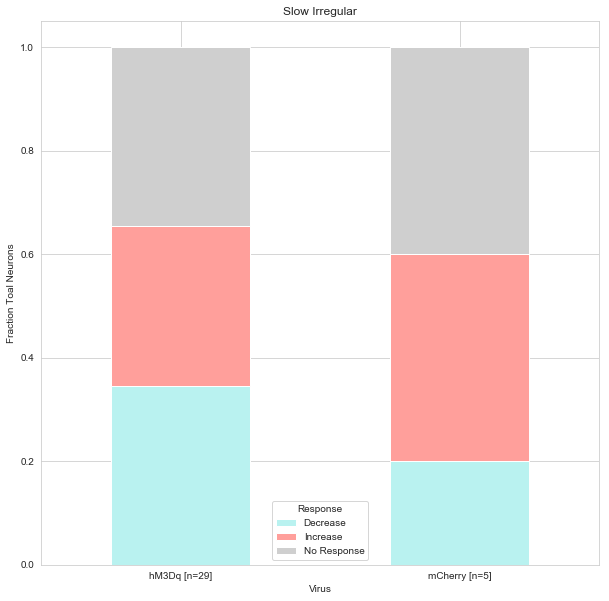

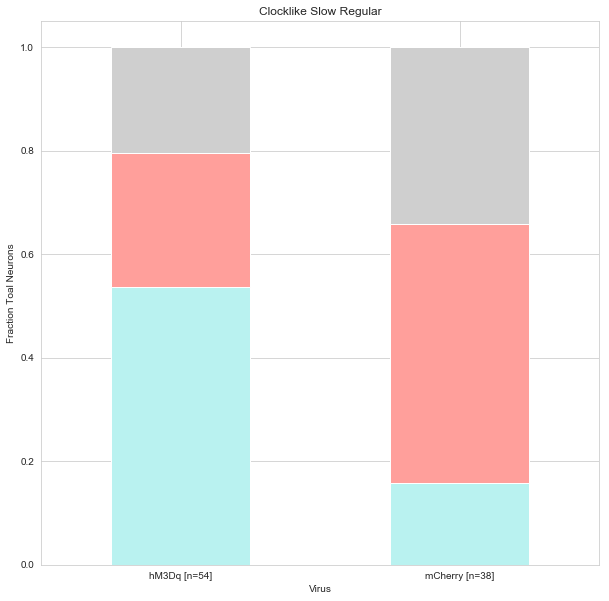

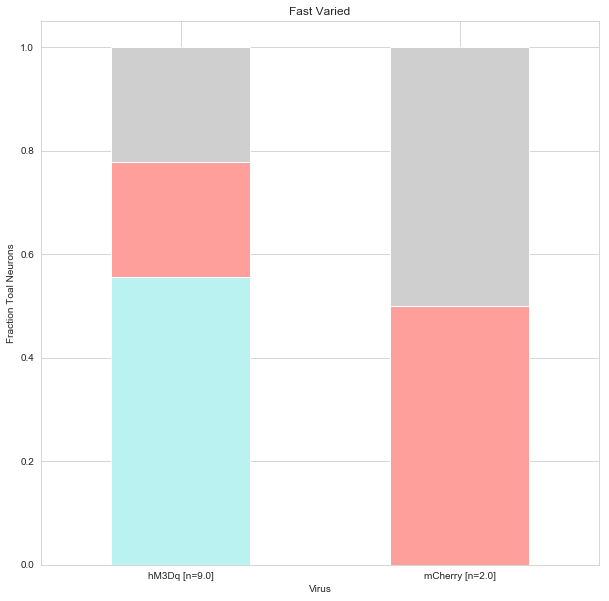

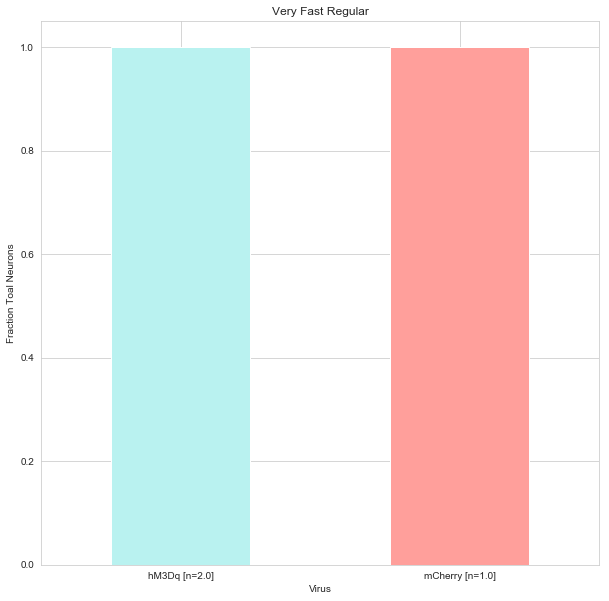

In [12]:
clusters = df['hc_cluster'].unique()
cmap = sns.color_palette('pastel', n_colors=20)[::-6]

save_dir = r'E:\figures\drug_effects'

# for cluster in clusters
for i, cluster in enumerate(clusters):
    f, a = plt.subplots(figsize=(10, 10))
    dfs = df[df['hc_cluster']==cluster]
    dfp = dfs.groupby(['Response', 'Virus']).size().reset_index().pivot(columns='Response',
                                                                index='Virus', values=0).fillna(0)
    sums = dfp.apply(np.sum, axis=1).values
    dfp = dfp.apply(lambda x: np.round(x/np.sum(x), 3), axis=1)
    dfp.reset_index().plot(x='Virus', kind='bar', stacked=True, 
                           color=cmap, ax=a)
    a.set_title(cluster)
    try:
        a.set_xticklabels([f'hM3Dq [n={sums[0]}]', f'mCherry [n={sums[1]}]'])
    except:
        pass
    plt.xticks(rotation=0)
    if i != 0:
        a.legend_.remove()
    a.set_ylabel('Fraction Toal Neurons')
#     plt.savefig(os.path.join(save_dir, f'{exp}_{cluster}_bar.png'), dpi=300)

In [13]:
def gen_subclusters(ts, dfc):
    return dfc.loc[dfc['neuron_id'].isin(ts.columns)]

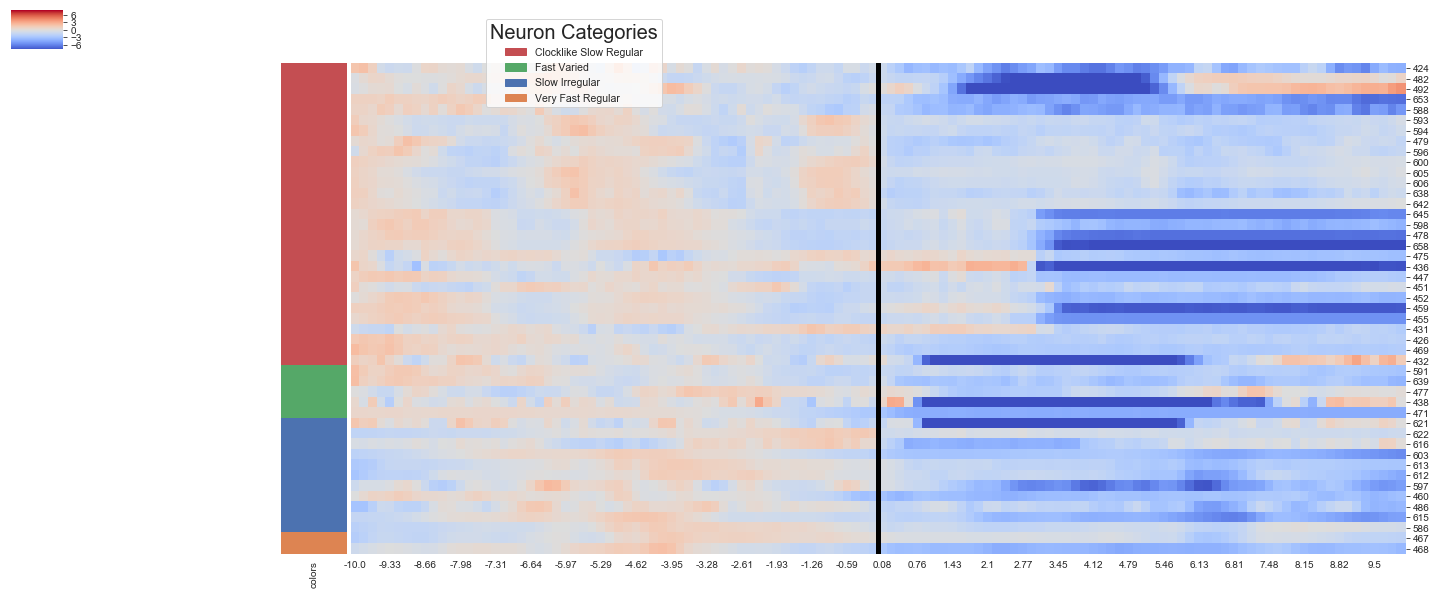

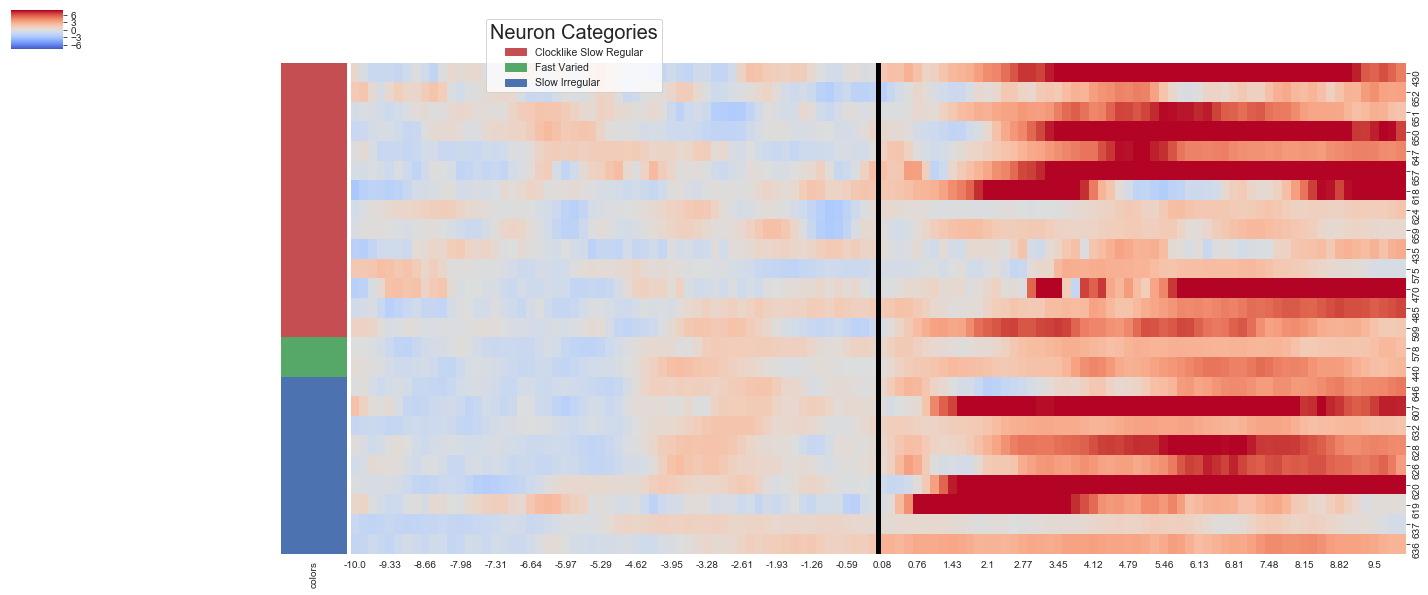

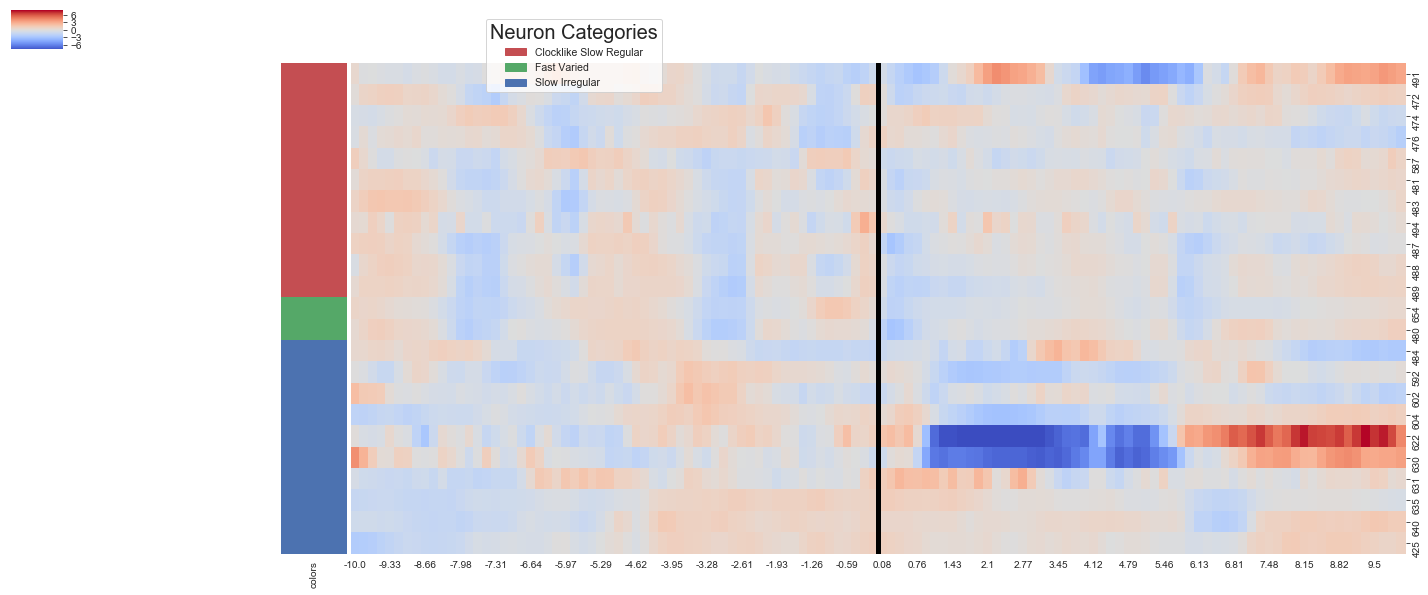

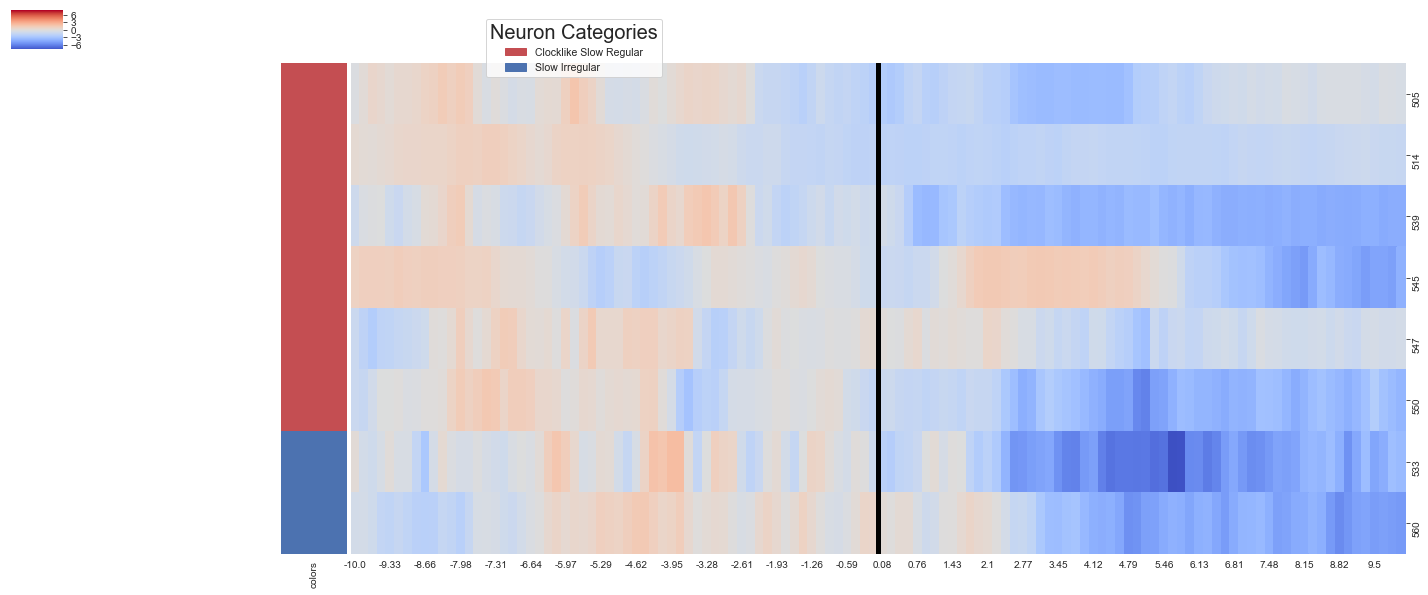

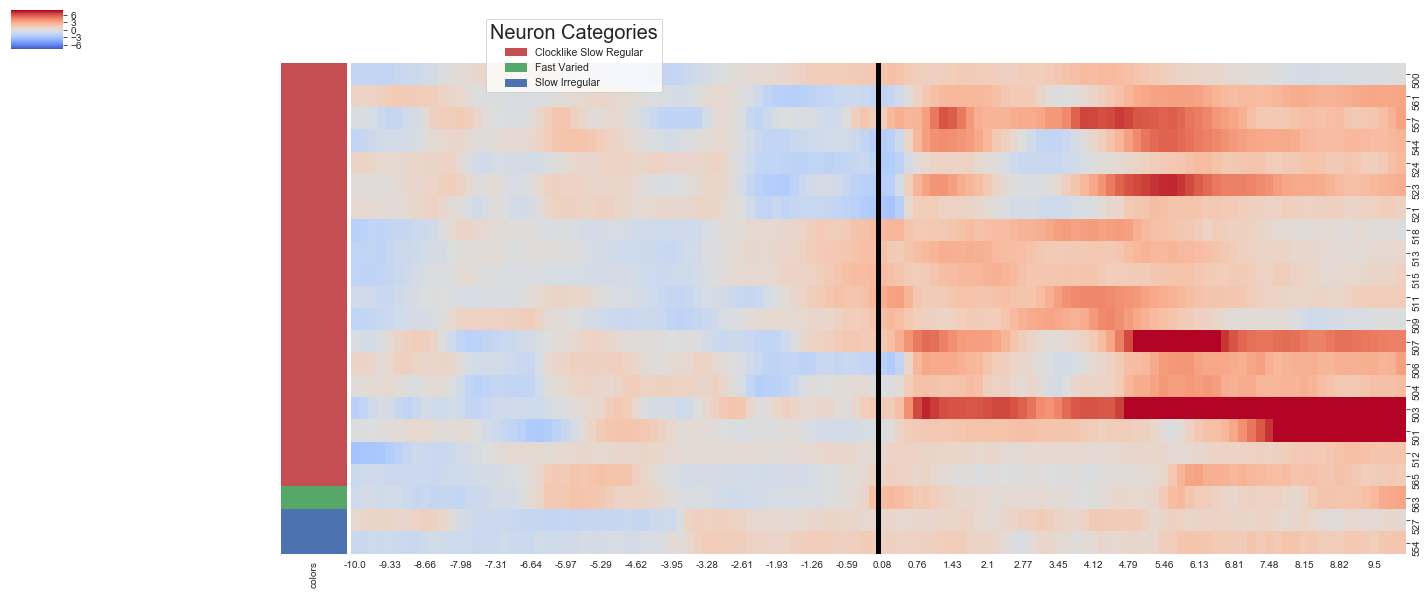

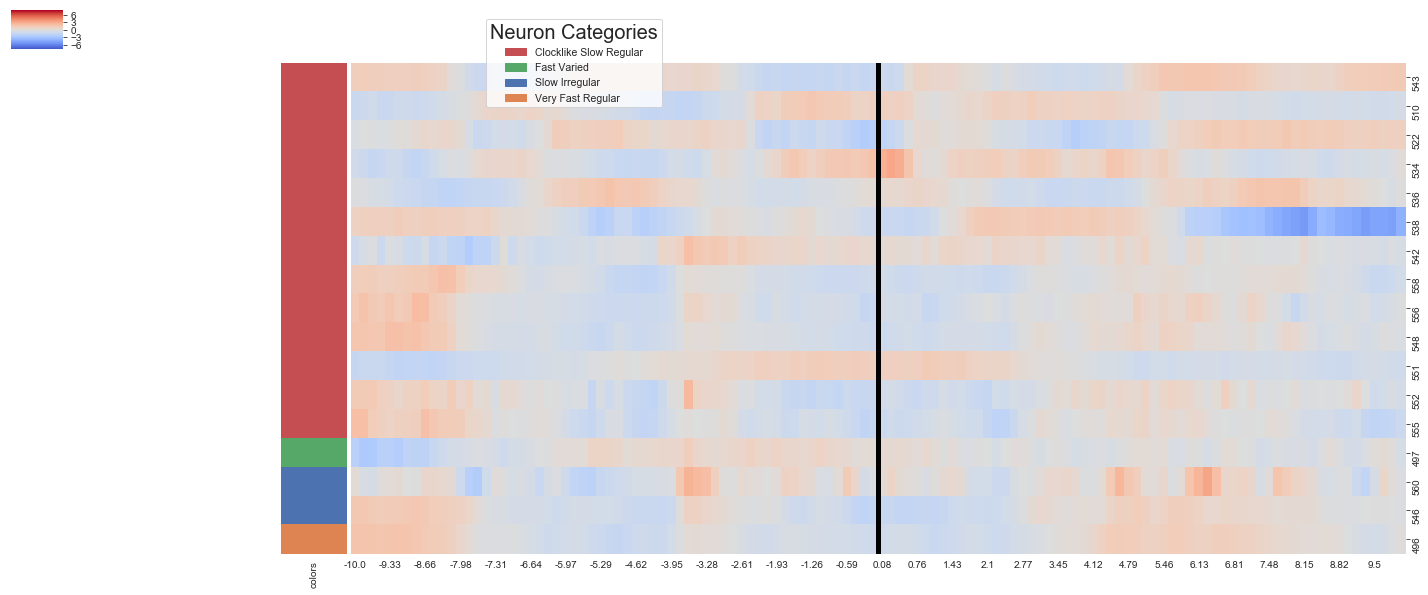

In [17]:
datasets = [('gq_decrease', gq_decrease), ('gq_increase', gq_increase), ('gq_non_responders', gq_non_responders),
          ('mcherry_decrease', mcherry_decrease), ('mcherry_increase', mcherry_increase), ('mcherry_non_responders', mcherry_non_responders)]

count=0
l=True
for name, dataset in datasets:
    if count!= 0:
        l = False
    subc = gen_subclusters(ts=dataset, dfc=dfc)
    cm = heatmap_by_cluster(subc, dataset, cluster_lab ='hc_cluster', vmin=-8, vmax=8, 
                            norm_period=60, spacing=False, label=l)
    cm.cax.set_visible(True)
#     plt.savefig(os.path.join(save_dir, f'{exp}_{name}_heat'), dpi=300)

,646,647,650,651,652,657,659,470,485,430,...,624,626,628,632,636,637,575,578,599,607
00:00:00,3.890741,5.443189,5.602673,3.853880,4.643465,5.916232,5.016914,3.876135,3.399080,1.520247,...,5.546535,5.488387,4.694243,3.810707,3.364498,1.718535,2.685578,17.651196,4.945535,1.618781
00:00:10,3.578120,5.505328,5.745202,3.889496,5.028717,5.876093,5.406380,3.957489,3.447138,1.262491,...,5.468417,5.570824,4.280021,3.886923,3.118982,1.909529,2.672677,17.761758,4.718433,1.713835
00:00:20,3.358964,5.096550,5.699885,3.980711,4.246252,5.967521,5.628715,4.017714,3.457533,2.182804,...,5.428492,5.181238,3.888937,3.942364,2.884673,2.335330,2.663386,17.022454,4.586036,1.968770
00:00:30,3.356176,4.803448,5.502788,4.053793,3.389883,5.883074,5.589693,4.045414,3.448686,2.884283,...,5.348855,4.844693,3.847501,3.882081,3.000745,2.221742,2.666993,16.644177,4.756321,1.758863
00:00:40,3.337704,5.138062,5.376245,4.025096,3.464125,5.745736,5.393403,4.088353,3.436430,2.899919,...,5.213367,5.027897,3.981671,3.773755,3.324038,2.185483,2.670789,16.406776,4.881880,1.653243
00:00:50,3.293953,5.380314,5.507207,3.949125,3.538444,5.972516,5.546214,4.134759,3.418879,2.909118,...,5.102555,5.252098,3.649778,3.799548,3.442013,2.183890,2.657046,16.452392,4.738126,1.982041
00:01:00,3.447647,5.197552,5.752541,3.847735,3.284225,5.759739,5.894050,4.153618,3.411060,2.624387,...,5.079052,5.005178,3.274761,3.931804,3.249169,1.888196,2.623941,16.973573,4.651237,2.162375
00:01:10,3.690614,5.180004,6.032119,3.858102,3.519506,5.512933,6.323150,4.175205,3.427750,4.352152,...,5.141782,4.631299,3.222005,3.977075,2.953841,1.690529,2.589657,17.153815,4.709079,1.999694
00:01:20,3.441389,5.397988,6.090555,4.097445,3.979464,5.754486,6.385101,4.212732,3.455674,4.513585,...,5.190089,4.623660,3.271629,3.941776,2.827595,1.965645,2.576897,16.756434,4.786145,1.840551
00:01:30,3.223272,5.530198,5.865588,4.225209,4.028712,6.066594,6.471136,4.239362,3.462448,5.002995,...,5.098122,4.601494,3.359103,3.975737,2.972655,1.979635,2.590630,17.473084,4.864430,2.086955
